In [1]:
#MOVIE RATING PREDICTION

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('archive/IMDb-Movies-India.csv', encoding='latin-1')

In [5]:
data.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [6]:
data.tail(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
15499,Zulm Ka Jawab,(1995),NaN,Action,NaN,NaN,Surinder Kapoor,Goga Kapoor,Shakti Kapoor,Kiran Kumar
15500,Zulm Ka Muqabla,(1993),NaN,Action,NaN,NaN,Babu Antony,Nandamuri Balakrishna,Vijayshanti,NaN
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra,Moushumi Chatterjee,Govinda
15502,Zulm Ki Pukar,(1979),NaN,Action,NaN,NaN,Dinesh-Ramanesh,Ramesh Puri,Jalal Agha,Valerie Agha
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [7]:
data.shape

(15509, 10)

In [8]:
print('Number of Rows',data.shape[0])
print('Number of Columns',data.shape[1])

Number of Rows 15509
Number of Columns 10


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
data.isnull().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

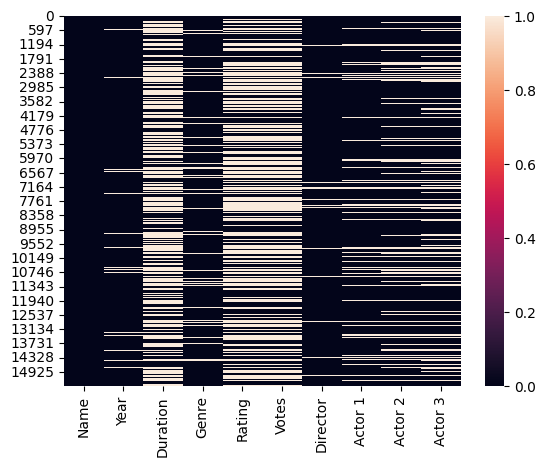

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(data.isnull())
plt.show()

In [12]:
data = data.dropna(axis=0)

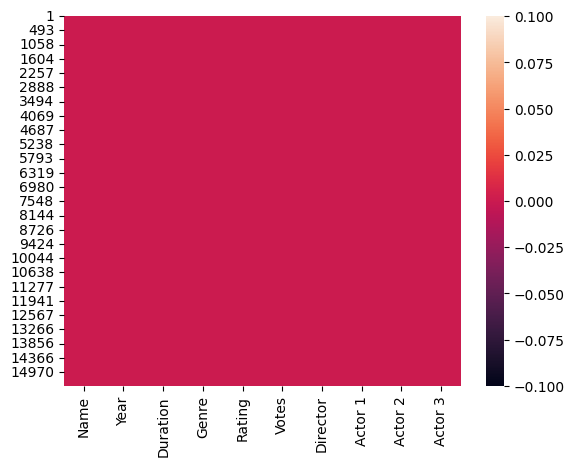

In [13]:
sns.heatmap(data.isnull())
plt.show()


In [14]:
dup_data=data.duplicated().any()
print("Are there any duplicated values in data?",dup_data)

Are there any duplicated values in data? False


In [15]:
data.describe()

,Rating
count,5659.000000
mean,5.898533
std,1.381165
min,1.100000
25%,5.000000
50%,6.100000
75%,6.900000
max,10.000000


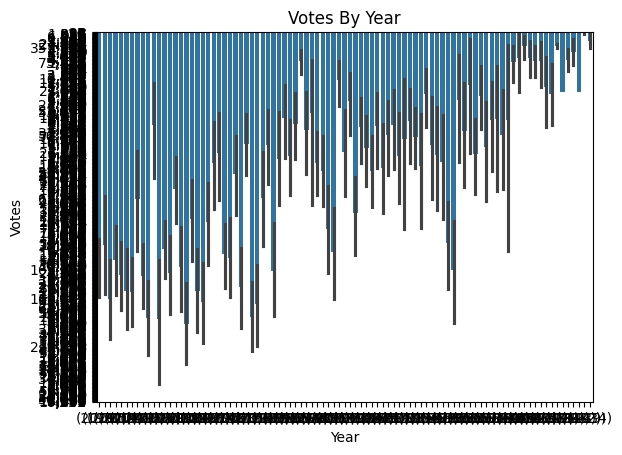

In [16]:
sns.barplot(x='Year',y='Votes',data=data)
plt.title("Votes By Year")
plt.show()

In [19]:
print(data.columns)
sns.barplot(x='Year', y='Revenue', data=data)
plt.title("Revenue By Year")
plt.show()


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')


ValueError: Could not interpret value `Revenue` for `y`. An entry with this name does not appear in `data`.

In [ ]:
data.groupby('Director')['Rating'].mean().sort_values(ascending=False)

In [ ]:
le =data.nlargest(10,'Runtime (Minutes)')[['Title','Runtime (Minutes)']]. \
set_index('Title')

In [ ]:
sns.barplot(le['Runtime (Minutes)'],y=le.index)
plt.title('Top 5 Lengtly Movies')
plt.show()

In [ ]:
sns.countplot(x='Year',data=data)
plt.title("Number of Movies Per Year")

In [ ]:
data.columns

In [ ]:
data[data['Revenue (Millions)'].max() == data['Revenue (Millions)']]['Title']

In [ ]:
top_10=data.nlargest(10,'Rating')[['Title','Rating','Director']].set_index('Title')

In [ ]:
top_10

In [ ]:
sns.barplot(top_10['Rating'],top_10.index)
plt.title("Display Top 10 Highest Rated Movie Titles")

In [ ]:
data.columns

In [ ]:
data.sort_values(by='Revenue (Millions)',ascending=False).head(10)

In [ ]:
top_10 = data.nlargest(10,'Revenue (Millions)')[['Title','Director','Revenue (Millions)']].set_index('Title')

In [ ]:
sns.barplot(top_10['Revenue (Millions)'],top_10.index)
plt.title("Display Top 10 Highest Revenue Movie Titles")
plt.show()

In [ ]:
data.columns

In [ ]:
def rating(rating):
    if rating>=7.0:
        return 'Excellent'
    elif rating>=6.0:
        return 'Good'
    else:
        return 'Average'

In [ ]:
data['rating_cat']=data['Rating'].apply(rating)

In [ ]:
data.head(1)

In [ ]:
list1=[]
for value in data['Genre']:
    list1.append(value.split(','))
data['temp']=list1

In [ ]:
genre=input("Enter Genre you want to count : ").title()
count=0
for value in data['temp']:
    if genre in value:
        count=count+1
print("Total Count is",count)